In [2]:
import os
import pandas as pd

# Step 1: Load the datasets
# Replace these file paths with the paths to your data files
species_names_path = '/content/drive/MyDrive/BNG/Species_Names.csv'
species_trends_path = '/content/drive/MyDrive/BNG/Species_Trends.csv'
merged_file_path = '/content/drive/MyDrive/BNG/merged_file.csv'

# Load the datasets
species_names = pd.read_csv(species_names_path)
species_trends = pd.read_csv(species_trends_path)
merged_data = pd.read_csv(merged_file_path)

# Step 2: Reduce memory usage by selecting only necessary columns
# Select relevant columns for analysis
merged_data_reduced = merged_data[['Group', 'Species', 'Year', 'Mean', 'Lower_CI', 'Upper_CI', 'Standard_deviation', 'Rhat']]
combined_data_reduced = species_trends[['Group', 'Species', 'N_Years', 'First_Year', 'Last_Year', 'N_Records', 'Mean_growth_rate', 'Lower_CI', 'Upper_CI', 'Precision']]

# Step 3: Merge species_names and species_trends on 'Group' and 'Species'
combined_data = pd.merge(species_names, combined_data_reduced, on=['Group', 'Species'], how='inner')

# Step 4: Merge the result with merged_data on 'Group' and 'Species'
final_combined_data = pd.merge(combined_data, merged_data_reduced, on=['Group', 'Species'], how='inner')

# Step 5: Save the final combined data to a new CSV file
final_combined_data.to_csv('final_combined_data.csv', index=False)

print("Merging complete. The combined data is saved as 'final_combined_data.csv'.")


Merging complete. The combined data is saved as 'final_combined_data.csv'.


In [5]:
import pandas as pd

# Reload the merged data
final_combined_data = pd.read_csv('/content/final_combined_data.csv')

# Check for missing values in the final combined data
missing_values = final_combined_data.isnull().sum()

# Handle missing values: Drop rows with missing values for simplicity in this analysis
final_combined_data_cleaned = final_combined_data.dropna()

# Adjust the list of numerical columns based on the available columns
numerical_columns = ['Year', 'Mean', 'Standard_deviation', 'Rhat',
                     'N_Years', 'First_Year', 'Last_Year', 'N_Records', 'Mean_growth_rate', 'Precision']

# Convert the adjusted numerical columns to float
final_combined_data_cleaned[numerical_columns] = final_combined_data_cleaned[numerical_columns].astype(float)

# Display the cleaned data and summary of missing values
final_combined_data_cleaned.info()


<ipython-input-5-ea9054ec14de>:4: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  final_combined_data = pd.read_csv('/content/final_combined_data.csv')


<class 'pandas.core.frame.DataFrame'>
Index: 184 entries, 456780 to 456963
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Group                184 non-null    object 
 1   Species              184 non-null    object 
 2   Name_origin          184 non-null    object 
 3   In_final_dataset     184 non-null    object 
 4   Reason_not_included  184 non-null    object 
 5   Details              184 non-null    object 
 6   N_Years              184 non-null    float64
 7   First_Year           184 non-null    float64
 8   Last_Year            184 non-null    float64
 9   N_Records            184 non-null    float64
 10  Mean_growth_rate     184 non-null    float64
 11  Lower_CI_x           184 non-null    float64
 12  Upper_CI_x           184 non-null    float64
 13  Precision            184 non-null    float64
 14  Year                 184 non-null    float64
 15  Mean                 184 non-null    

<ipython-input-5-ea9054ec14de>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_combined_data_cleaned[numerical_columns] = final_combined_data_cleaned[numerical_columns].astype(float)


<ipython-input-11-91bf2600cbaf>:7: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  final_combined_data_cleaned = pd.read_csv('/content/final_combined_data.csv')


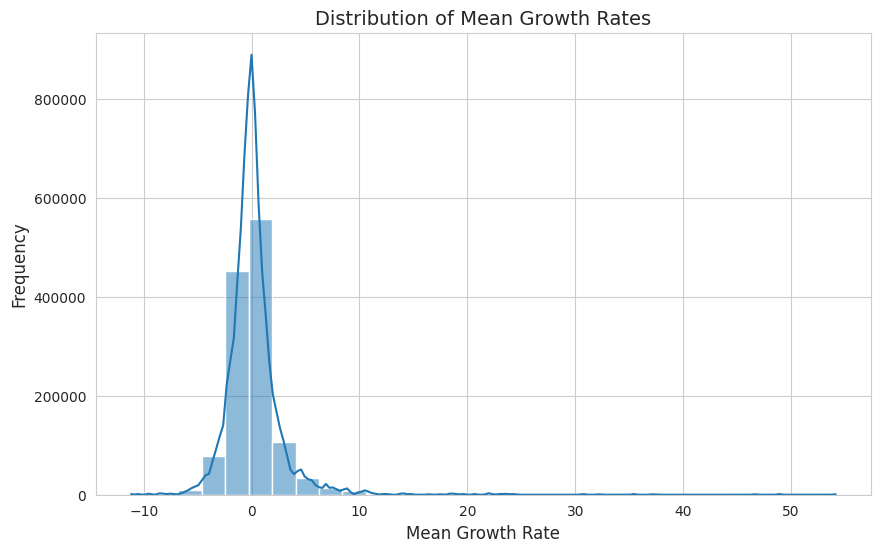

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the preprocessed and cleaned data
# Make sure to update the file path with your saved data
final_combined_data_cleaned = pd.read_csv('/content/final_combined_data.csv')


# Step 2.2: Analyze Growth Rates with a Histogram
plt.figure(figsize=(10, 6))
sns.histplot(final_combined_data_cleaned['Mean_growth_rate'], bins=30, kde=True)
plt.title("Distribution of Mean Growth Rates", fontsize=14)
plt.xlabel("Mean Growth Rate", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()



<ipython-input-10-72a9ab5fb950>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=final_combined_data, x='Group', y='Mean_growth_rate', palette='coolwarm')


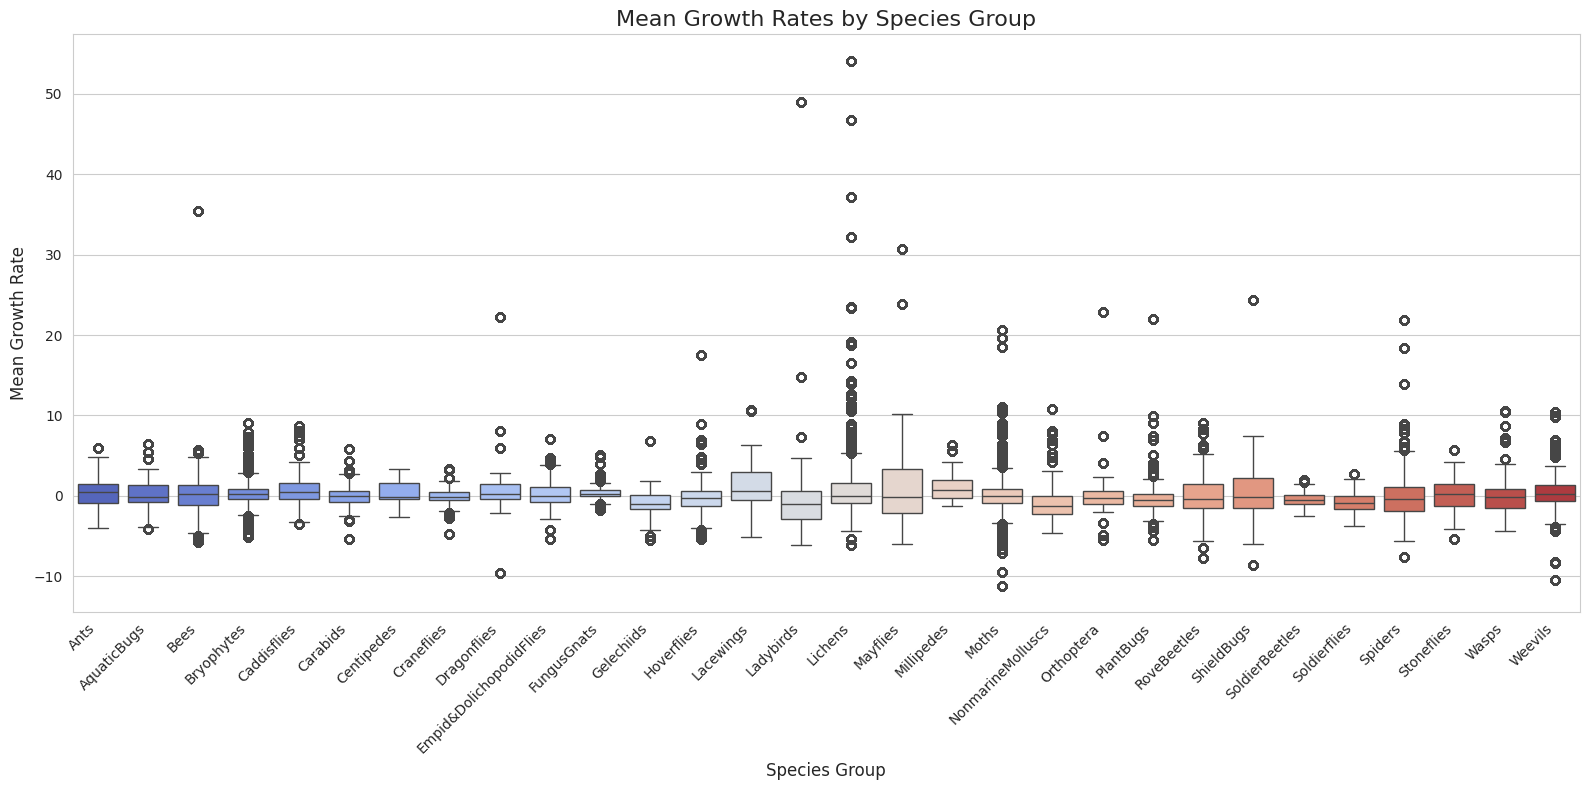

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a general style for clarity
sns.set_style("whitegrid")

# Improved Box Plot of Growth Rates by Species Group
plt.figure(figsize=(16, 8))
sns.boxplot(data=final_combined_data, x='Group', y='Mean_growth_rate', palette='coolwarm')
plt.title("Mean Growth Rates by Species Group", fontsize=16)
plt.xlabel("Species Group", fontsize=12)
plt.ylabel("Mean Growth Rate", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




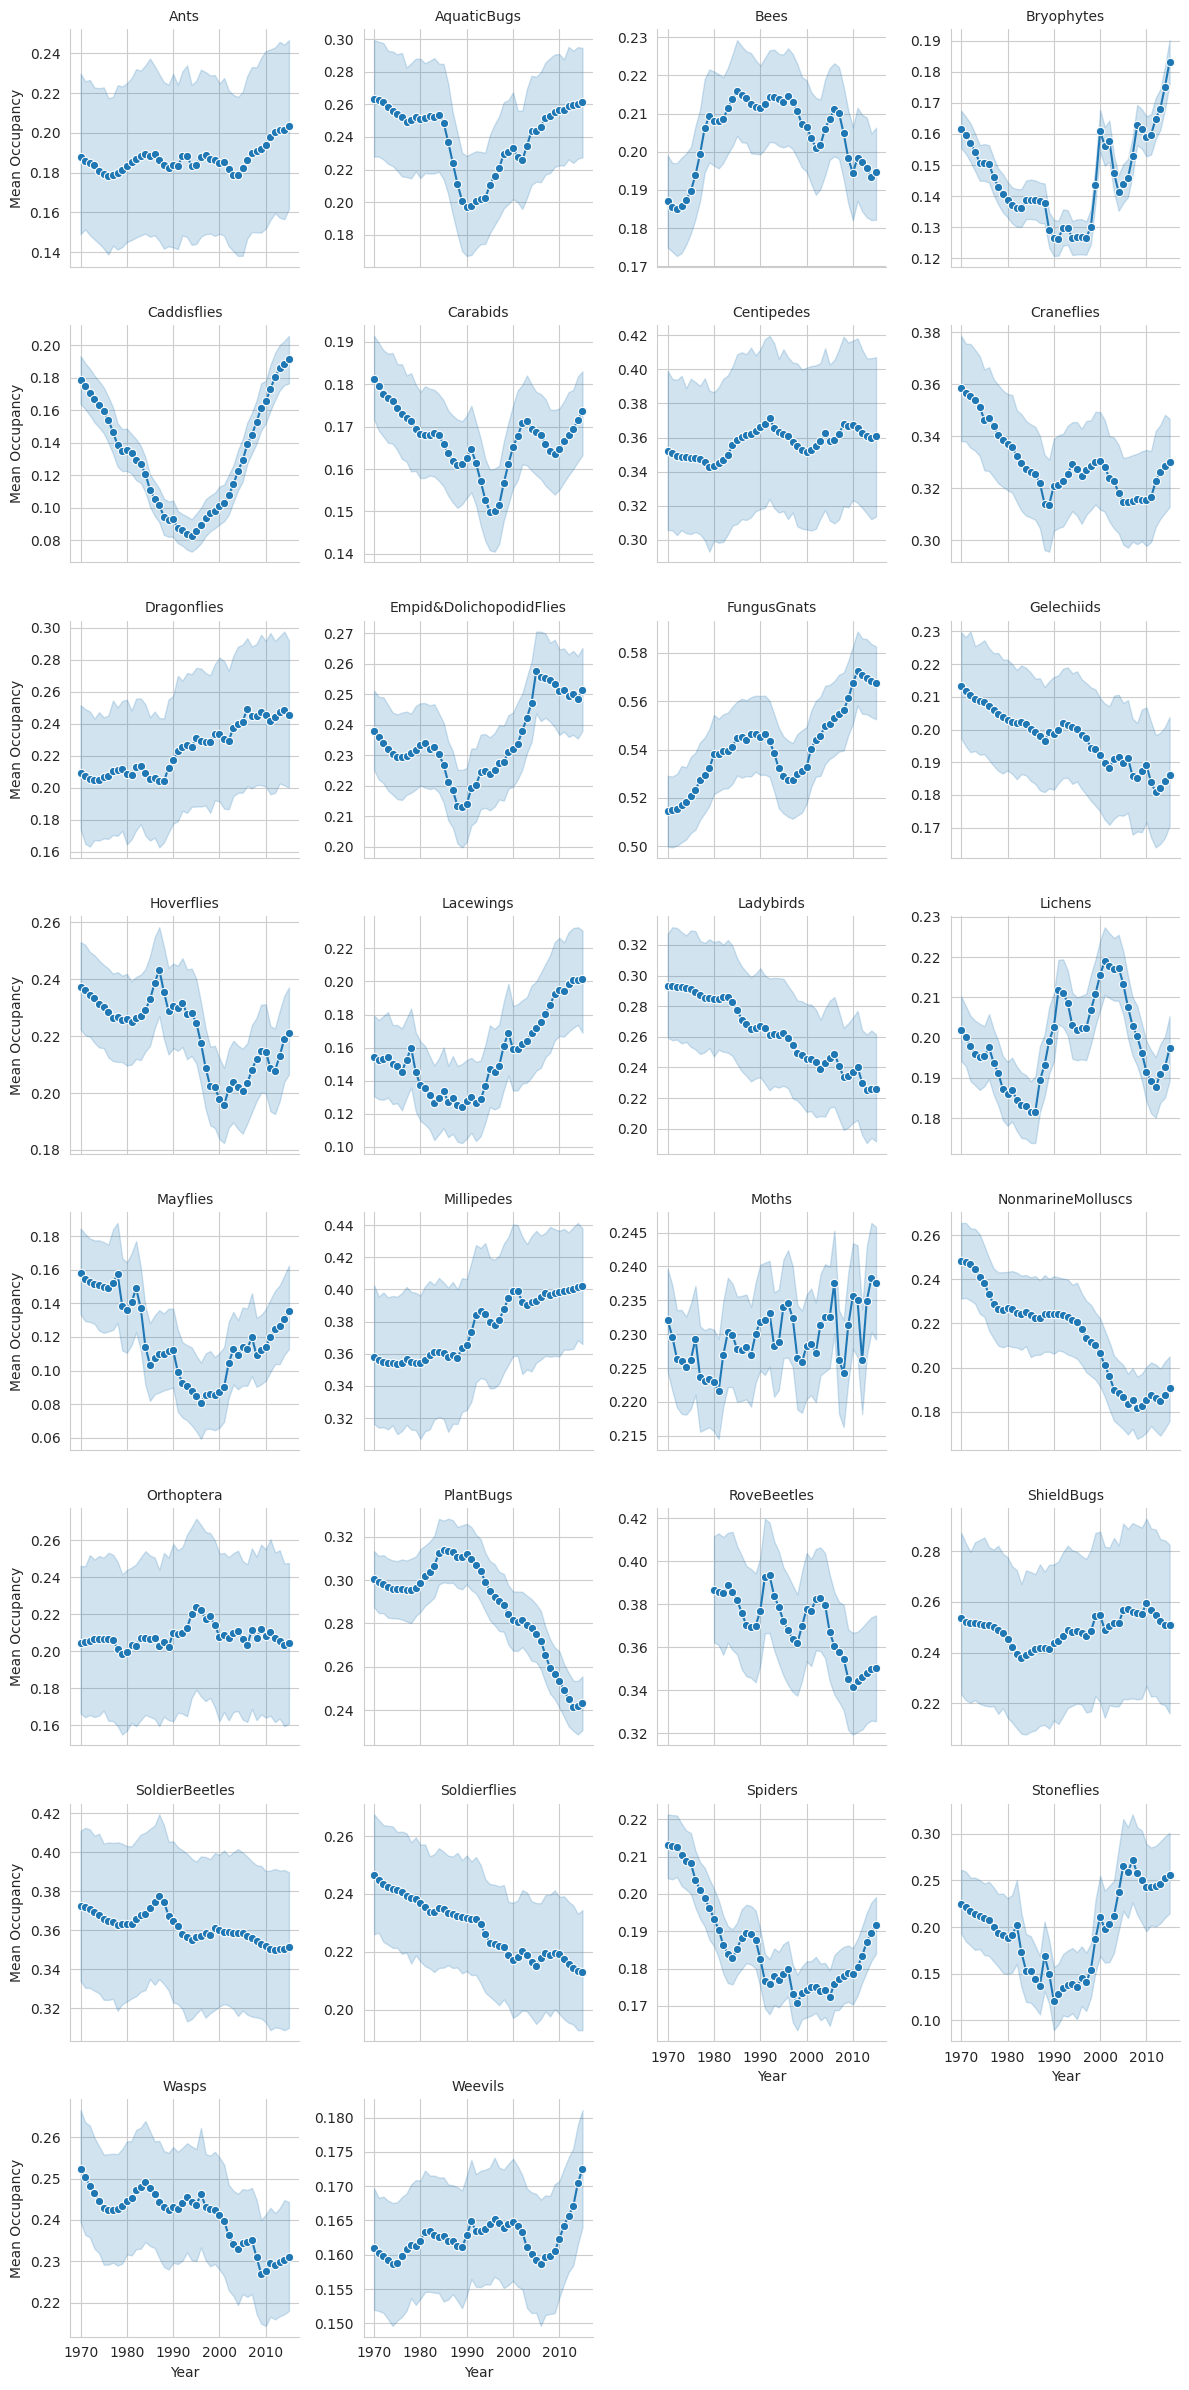

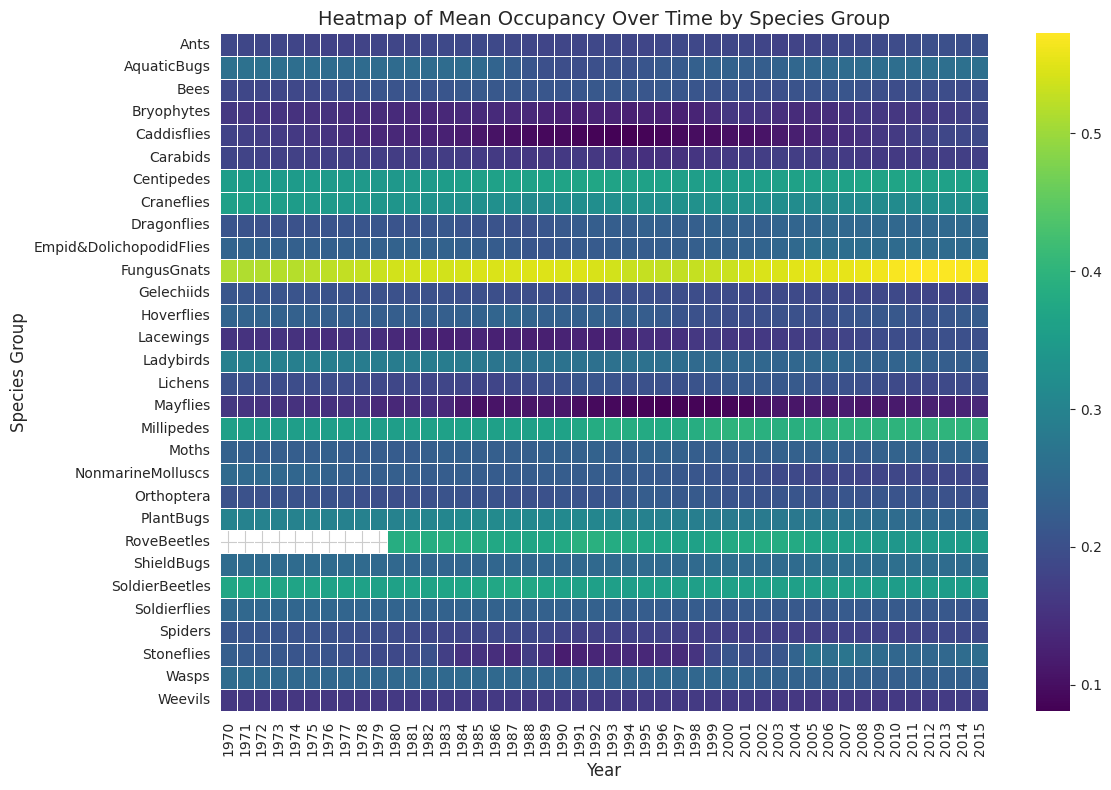

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Faceted Line Plot: Break down into smaller, more manageable groups
g = sns.FacetGrid(final_combined_data, col="Group", col_wrap=4, height=3, sharey=False)
g.map(sns.lineplot, "Year", "Mean", marker="o")
g.set_titles("{col_name}")
g.set_axis_labels("Year", "Mean Occupancy")
plt.tight_layout()
plt.show()

# Heatmap: Show changes in mean occupancy over time for each group
# Pivot the data to create a matrix for the heatmap
pivot_data = final_combined_data.pivot_table(index='Group', columns='Year', values='Mean', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, cmap='viridis', linewidths=0.5)
plt.title("Heatmap of Mean Occupancy Over Time by Species Group", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Species Group", fontsize=12)
plt.tight_layout()
plt.show()


In [13]:
# Ensure we are working with the correct columns for 'Year' data
import pandas as pd

# Step 1: Calculate the first and last year for each group
first_years = final_combined_data.groupby('Group')['Year'].min().reset_index()
last_years = final_combined_data.groupby('Group')['Year'].max().reset_index()

# Step 2: Merge the first and last year data back to the main dataset
bng_data = final_combined_data.merge(first_years, on="Group", suffixes=('', '_First'))
bng_data = bng_data.merge(last_years, on="Group", suffixes=('', '_Last'))

# Step 3: Get the mean occupancy at the first and last year
initial_occupancy = bng_data[bng_data['Year'] == bng_data['Year_First']][['Group', 'Mean']].rename(columns={'Mean': 'Initial_Occupancy'})
final_occupancy = bng_data[bng_data['Year'] == bng_data['Year_Last']][['Group', 'Mean']].rename(columns={'Mean': 'Final_Occupancy'})

# Step 4: Merge to calculate the net change
bng_summary = initial_occupancy.merge(final_occupancy, on='Group')
bng_summary['Net_Gain'] = bng_summary['Final_Occupancy'] - bng_summary['Initial_Occupancy']

# Display the summary of Biodiversity Net Gain
print(bng_summary)


            Group  Initial_Occupancy  Final_Occupancy  Net_Gain
0            Ants              0.034            0.039     0.005
1            Ants              0.034            0.001    -0.033
2            Ants              0.034            0.499     0.465
3            Ants              0.034            0.002    -0.032
4            Ants              0.034            0.074     0.040
...           ...                ...              ...       ...
57812843  Weevils              0.265            0.434     0.169
57812844  Weevils              0.265            0.506     0.241
57812845  Weevils              0.265            0.022    -0.243
57812846  Weevils              0.265            0.123    -0.142
57812847  Weevils              0.265            0.254    -0.011

[57812848 rows x 4 columns]


<ipython-input-14-e627cb20a607>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bng_aggregated, x='Group', y='Net_Gain', palette='viridis')


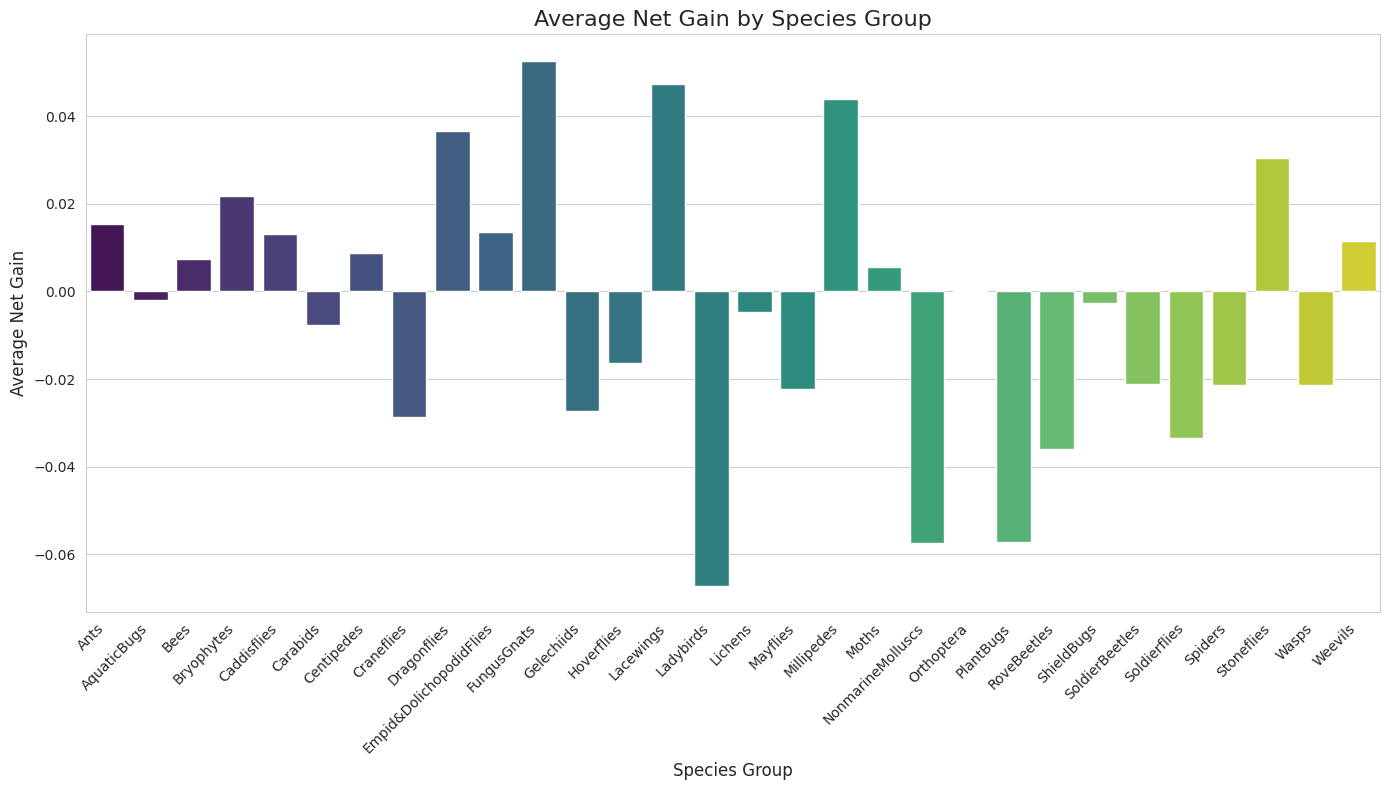

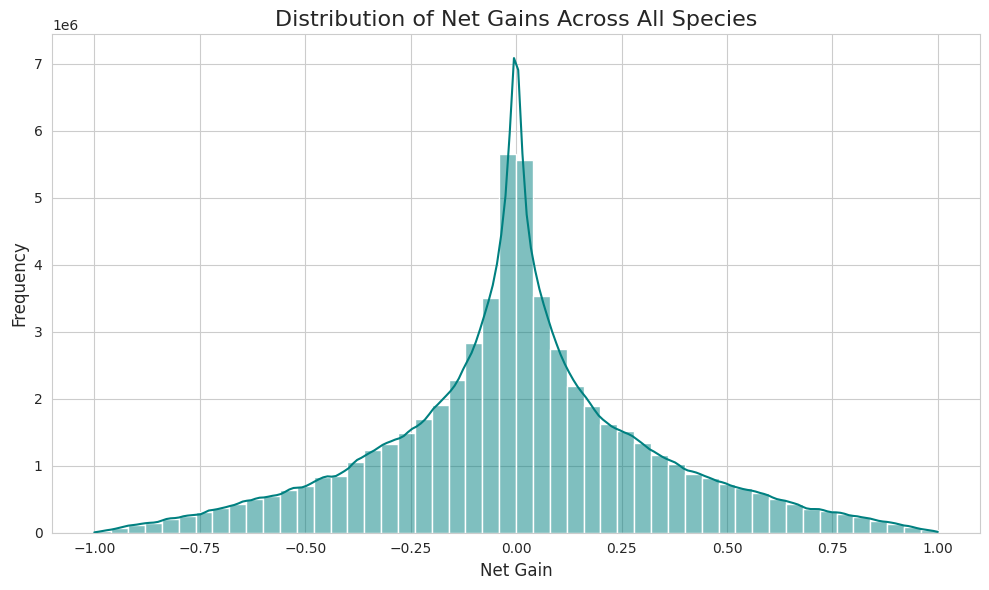

<ipython-input-14-e627cb20a607>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=bng_summary, x='Group', y='Net_Gain', palette='Set2')


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Aggregate Net Gain by Group for a Bar Plot
bng_aggregated = bng_summary.groupby('Group')['Net_Gain'].mean().reset_index()

# Step 2: Create a Bar Plot to show the average Net Gain for each Group
plt.figure(figsize=(14, 8))
sns.barplot(data=bng_aggregated, x='Group', y='Net_Gain', palette='viridis')
plt.title("Average Net Gain by Species Group", fontsize=16)
plt.xlabel("Species Group", fontsize=12)
plt.ylabel("Average Net Gain", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Step 3: Create a Distribution Plot for Net Gain
plt.figure(figsize=(10, 6))
sns.histplot(bng_summary['Net_Gain'], bins=50, kde=True, color='teal')
plt.title("Distribution of Net Gains Across All Species", fontsize=16)
plt.xlabel("Net Gain", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.tight_layout()
plt.show()
